In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('student-mat.csv', sep=';')

In [61]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
168,GP,F,16,U,GT3,T,2,2,other,other,...,5,1,5,1,1,4,0,6,7,0
139,GP,F,15,U,GT3,T,4,4,teacher,teacher,...,4,3,2,1,1,5,0,16,16,15
75,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,3,3,2,3,5,6,9,9,10
119,GP,M,15,U,GT3,T,3,4,other,other,...,3,4,3,1,2,4,6,14,13,13
148,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,0,7,6,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [63]:
print(df.duplicated().sum())

0


In [64]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

#we are apllying label encoding instead of OHC beacuse its sufficient for the case where features like school, gender etc has binary val whereas we can use OHC where there are mmore than two category

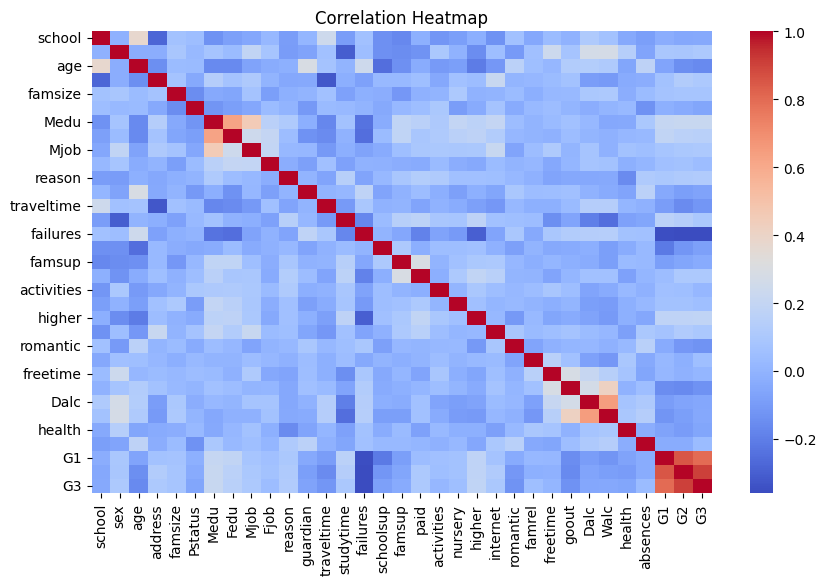

In [66]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
X_student = df.drop('G3', axis=1)
y_student = df['G3']
#G3 is the final grade so we are taking it as target

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_student, y_student, test_size=0.2, random_state=42)
#this step will split data

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#scaling the data so our data won't be biased

In [70]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#training data on linear reg and predicting val

In [71]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

#MSE is showing the distance between the actual and predicted val



MSE: 5.032394108866746
R2 Score: 0.7545777855043497


##For logistic regression


In [74]:
import pandas as pd
df = pd.read_csv("student-mat.csv", sep = ';')
print(df.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [75]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)
# it will take 'pass' column (1 = pass, 0 = fail)

In [76]:
df = df.drop(columns=['G3'])

In [77]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [78]:
X = df.drop('pass', axis=1)
y = df['pass']
#splitting data

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

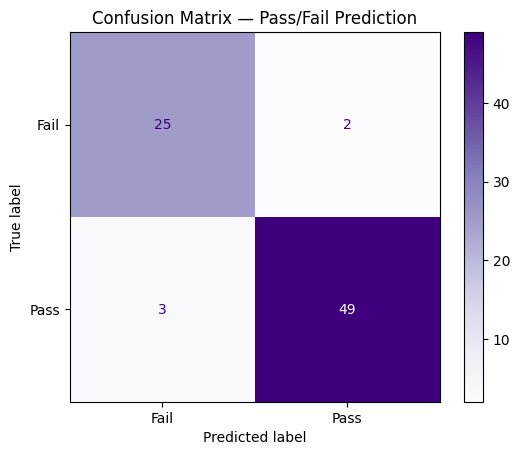

In [82]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix — Pass/Fail Prediction")
plt.show()

In [83]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("Classification Report")
print(classification_report(y_test, y_pred))
#logistic regression

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79



###**Linear Regression:**
The model achieved an MSE of 5.03 and an R² score of 0.75, it shows a good fit and reliable grade predictions.

###**Logistic Regression:**
It achieved 94% accuracy, 0.96 precision, 0.94 recall, and 0.95 F1-score, showing excellent performance in predicting pass/fail outcomes.

###**Comparison:**
While Linear Regression performs well for predicting exact grades, Logistic Regression shows superior overall accuracy and consistency for classifying student performance.